In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import geopy.distance

In [4]:
user_reviews = pd.read_pickle('data/user_reviews.p')
user_reviews2 = pd.read_pickle('data/user_reviews2.p')

user_reviews = pd.concat([user_reviews, user_reviews2]).sort_values('user_id')
user_reviews.index = range(len(user_reviews))
unique_venues = pd.read_pickle('data/unique_venues.p')

reviews = pd.read_pickle('data/reviews.p')

In [5]:
states = []

for i in range(len(unique_venues)):

    try:
        zip = int(unique_venues['clean_address'][i].split(' ')[-2])
        
        st = unique_venues['clean_address'][i].split(' ')[-3]
        
        if st == 'Rico':
            st = 'PR'
            
        if st == 'Hawaii':
            st = 'HI'
        
        states += [st]
        
    except:
        
#         states += [unique_venues['clean_address'][i].split(' ')[-2]]
        states += ['other']

unique_venues['states'] = states

In [6]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews['state'] = [i.split(', ')[-1] for i in reviews['location']]

In [7]:
user_reviews['date'] = pd.to_datetime(user_reviews['date'])

In [8]:
reviews_pre = reviews[reviews['date'] < '2013-03-10']

reviews_post = reviews[reviews['date'] >= '2013-03-10']

(array([15.,  0.,  5.,  0.,  3.,  0., 10.,  0., 33.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Patch objects>)

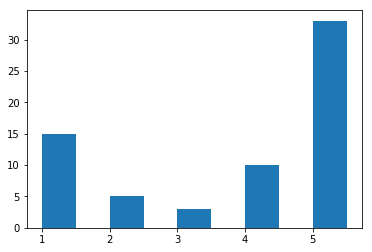

In [9]:
plt.hist(reviews_pre['rating'], bins = np.arange(1,5.6, 0.5))

(array([267.,   0.,  33.,   0.,  34.,   0.,  82.,   0., 165.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 9 Patch objects>)

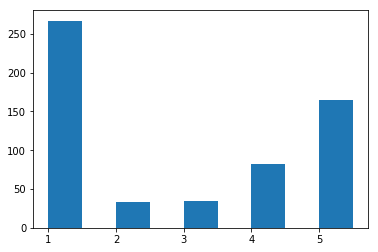

In [10]:
plt.hist(reviews_post['rating'], bins = np.arange(1, 5.6, 0.5))

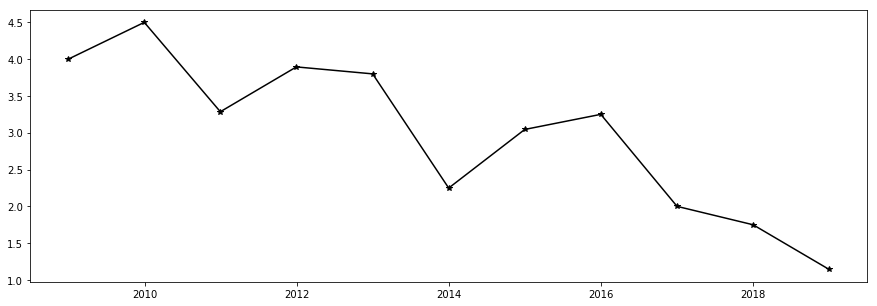

In [11]:
reviews.index = reviews['date']
plt.figure(figsize = (15,5))
plt.plot(reviews.groupby(pd.Grouper(freq='Y'))['rating'].mean(), 'k*-')

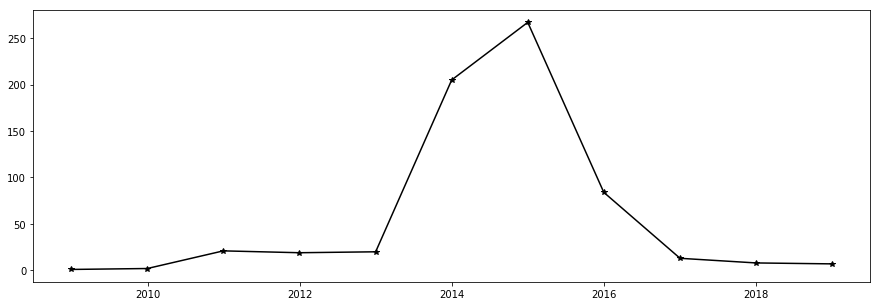

In [12]:
reviews.index = reviews['date']
plt.figure(figsize = (15,5))
plt.plot(reviews.groupby(pd.Grouper(freq='Y'))['rating'].count(), 'k*-')

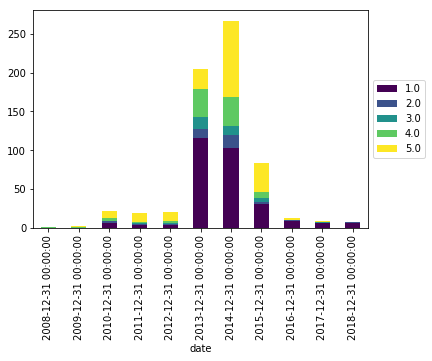

In [13]:
rating_count = reviews.groupby([pd.Grouper(freq='Y'), 'rating'])['rating'].count().unstack()

rating_count.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

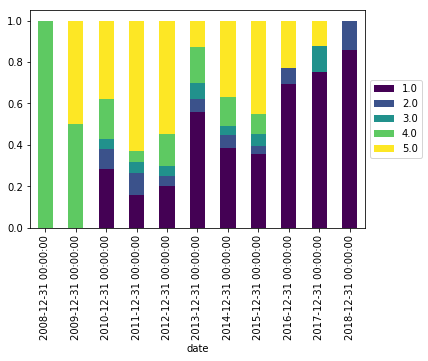

In [14]:
rating_count_norm = rating_count.values

rating_count_norm = rating_count_norm / np.nansum(rating_count_norm, axis = 1)[:,np.newaxis]
rating_count_norm = pd.DataFrame(data = rating_count_norm, columns=rating_count.columns, index = rating_count.index)

rating_count_norm.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [15]:
user_reviews = user_reviews.merge(unique_venues[['url','lat','lon','states']], on = ['url'], how = 'outer')

In [16]:
user_groups = user_reviews.groupby('user_id')

In [17]:
Amys_latlon = unique_venues.loc[unique_venues['url'] == "/biz/amys-baking-company-scottsdale", ['lat', 'lon']]


In [18]:
features = pd.DataFrame(index = user_reviews['user_id'].unique(), columns = unique_venues['states'].unique())

In [19]:
for i in features.index:
    
    r = user_groups.get_group(i)
    features.loc[i] = r.groupby('states')['score'].count() / r.groupby('states')['score'].count().sum()
    
    
features = features.fillna(0)    

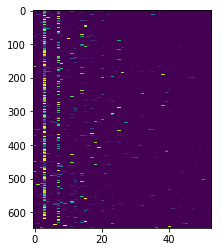

In [20]:
plt.imshow(features, aspect = 1e-1)

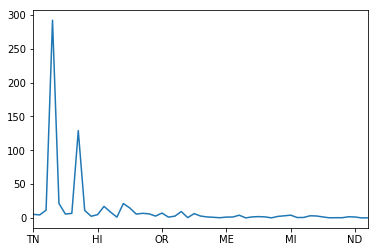

In [21]:
features.sum(axis = 0).plot(kind = 'line')

In [22]:
features = features.loc[:,features.sum(axis = 0) > 1.5]

In [23]:
features['user_id'] = features.index

In [24]:
features = features.merge(reviews, on = 'user_id')

In [25]:
features = features[['user_id', 'date', 'rating', 'text', 'location', 'photos', 'state', 'TN', 'VA', 'FL', 'AZ', 'NY', 'GA', 'NC', 'CA', 'WA', 'KY', 'HI',
       'other', 'NV', 'TX', 'IL', 'OH', 'MA', 'PA', 'IN', 'OR', 'LA', 'CO',
       'NJ', 'OK', 'NM', 'DC', 'MD', 'NH', 'MN', 'UT', 'MI', 'WI', 'MO', 'IA']]

In [26]:
features['word_count'] = [len(i.split(' ')) for i in features['text']]

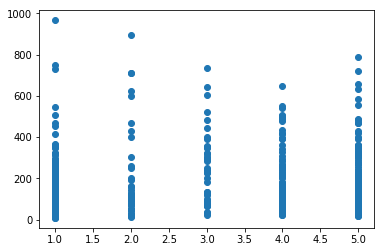

In [27]:
plt.scatter(features['rating'], features['word_count'])

/Users/mari/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


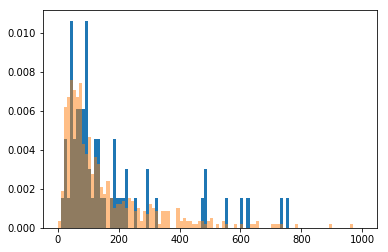

In [28]:
loc = features['date'] < '2013-03-10'
plt.hist(features.loc[loc,'word_count'], normed = True, range = [0, 1000], bins = 100);

loc = features['date'] >= '2013-03-10'
plt.hist(features.loc[loc,'word_count'], alpha = 0.5, normed = True, range = [0, 1000], bins = 100);

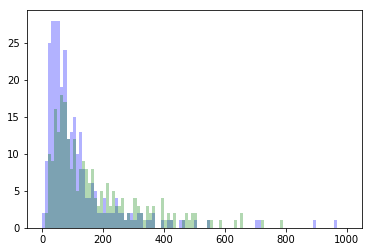

In [29]:

loc = (features['date'] >= '2013-03-10') & (features['rating'] <= 2)
plt.hist(features.loc[loc,'word_count'], alpha = 0.3, range = [0, 1000], bins = 100, color = 'b');

# loc = (features['date'] >= '2013-03-10') & (features['rating'] < 5) & (features['rating'] > 1)
# plt.hist(features.loc[loc,'word_count'], alpha = 0.3, normed = True, range = [0, 1000], bins = 100, color = 'r');


loc = (features['date'] >= '2013-03-10') & (features['rating'] >= 4)
plt.hist(features.loc[loc,'word_count'], alpha = 0.3, range = [0, 1000], bins = 100, color = 'g');

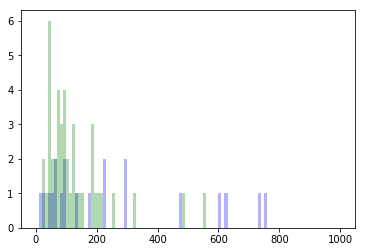

In [30]:

loc = (features['date'] < '2013-03-10') & (features['rating'] <= 2)
plt.hist(features.loc[loc,'word_count'], alpha = 0.3, range = [0, 1000], bins = 100, color = 'b');

# loc = (features['date'] >= '2013-03-10') & (features['rating'] < 5) & (features['rating'] > 1)
# plt.hist(features.loc[loc,'word_count'], alpha = 0.3, normed = True, range = [0, 1000], bins = 100, color = 'r');


loc = (features['date'] < '2013-03-10') & (features['rating'] >= 4)
plt.hist(features.loc[loc,'word_count'], alpha = 0.3, range = [0, 1000], bins = 100, color = 'g');

In [56]:
f = features[[
       'TN', 'VA', 'FL', 'AZ', 'NY', 'GA', 'NC', 'CA', 'WA', 'KY', 'HI',
       'other', 'NV', 'TX', 'IL', 'OH', 'MA', 'PA', 'IN', 'OR', 'LA', 'CO',
       'NJ', 'OK', 'NM', 'DC', 'MD', 'NH', 'MN', 'UT', 'MI', 'WI', 'MO', 'IA']]#,
#        'word_count']]

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy


# Calculate the distance between each sample
Z = hierarchy.linkage(f, 'ward')


T = hierarchy.fcluster(Z, 10, 'distance')
print(len(np.unique(T)))

2


2


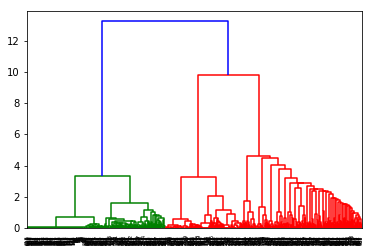

In [91]:
hierarchy.dendrogram(Z, color_threshold=10);

T = hierarchy.fcluster(Z, 10, 'distance')
print(len(np.unique(T)))

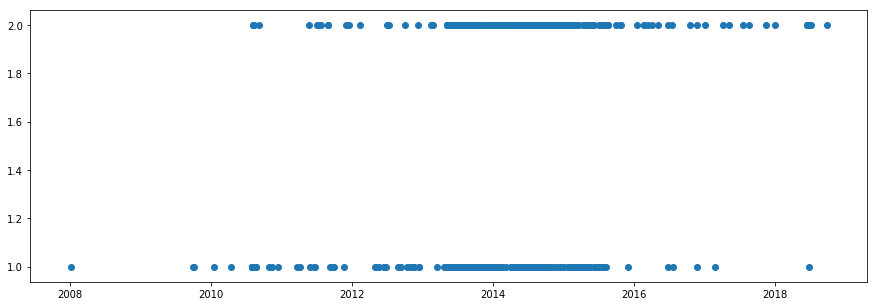

In [92]:
plt.figure(figsize = (15,5))
plt.scatter(features['date'], T)

In [93]:
features['pred'] = T

(array([1.43421053, 0.        , 0.125     , 0.        , 0.        ,
        0.125     , 0.        , 0.24342105, 0.        , 0.57236842]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

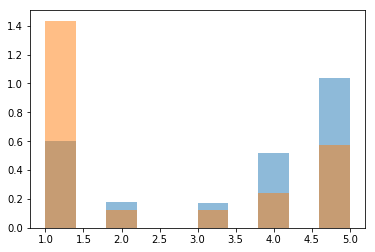

In [95]:
plt.hist(features.loc[T == 1, 'rating'], alpha = 0.5, normed = True)
plt.hist(features.loc[T == 2, 'rating'], alpha = 0.5, normed = True)
# plt.hist(features.loc[T == 3, 'rating'], alpha = 0.5, normed = True)


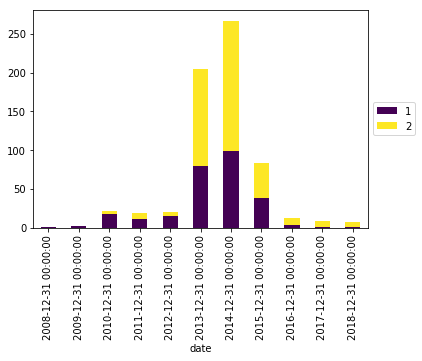

In [96]:
features.index = features['date']

feature_count = features.groupby([pd.Grouper(freq='Y'), 'pred'])['pred'].count().unstack()

feature_count.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

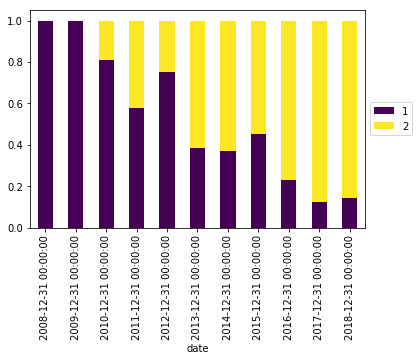

In [97]:
feature_count_norm = feature_count.values

feature_count_norm = feature_count_norm / np.nansum(feature_count_norm, axis = 1)[:,np.newaxis]
feature_count_norm = pd.DataFrame(data = feature_count_norm,
                                  columns=feature_count.columns, index = feature_count.index)

feature_count_norm.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [98]:
features['text_ref'] = [True if ('Nightmares' in i) or ('Ramsey' in i) else False for i in features['text']]

In [99]:
pd.crosstab(features['text_ref'], features['pred'])

pred,1,2
text_ref,,
False,222,315
True,45,65


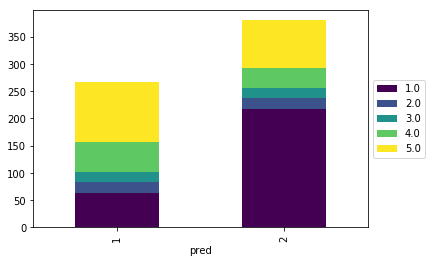

In [100]:
feature_count = features.groupby(['pred','rating'])['rating'].count().unstack()

feature_count.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

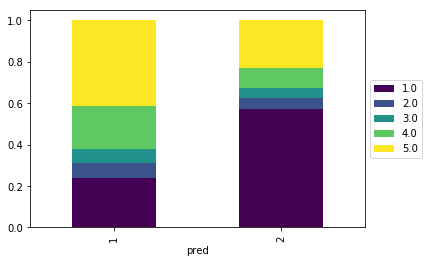

In [101]:
feature_count_norm = feature_count.values

feature_count_norm = feature_count_norm / np.nansum(feature_count_norm, axis = 1)[:,np.newaxis]
feature_count_norm = pd.DataFrame(data = feature_count_norm,
                                  columns=feature_count.columns, index = feature_count.index)

feature_count_norm.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [102]:
pd.crosstab(features['pred'], features['photos'])

photos,False,True
pred,,
1,237,30
2,349,31


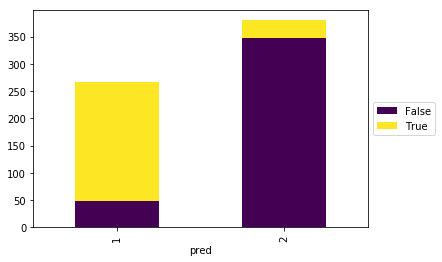

In [106]:
features['flag_AZ'] = features['state'] == 'AZ'
features['flag_CA'] = features['state'] == 'CA'
feature_count = features.groupby(['pred','flag_AZ'])['rating'].count().unstack()

feature_count.plot(kind='bar', stacked=True, cmap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [109]:
features.loc[T == 1,'text']

date
2015-06-07    My new FAV place!  Most of you would know this...
2014-12-19    I had a sweet tooth today and as I was checkin...
2012-12-13    I went to ABC during the filming of Kitchen Ni...
2014-09-29    My fiancee and I brought my daughter to Amy's ...
2014-07-11    Tonight was my second visit to ABC. My family ...
2010-08-02    Please don't let one person's grumpy mood ruin...
2013-06-22    Ordered the French Onion Soup - very hot but f...
2014-09-10    Went for the first time today for lunch.  Had ...
2015-06-09    I have not seen "the show" but friends had whe...
2012-05-03    This is really a great place. Nice, quite and ...
2014-04-28    We live in Queen Creek about 45 minutes from A...
2014-09-12    I visited, out of curiosity. While I didn't wi...
2015-04-15    I went there yesterday during business hours o...
2013-06-21    My husband and I visited Amy's this past Wedne...
2014-10-11    This was my first time back in quite a while. ...
2014-06-18    We went here because 

In [112]:
features[['user_id', 'text']].to_csv('features.csv')